## EDA

### Columns Dictionary

### Multivariate Analysis

In [1]:
#Importamos y guardamos el dataframe

import pandas as pd

RUTA_DATAFRAME = '/media/tr4shhh/Tr4Shhh_FOLDER/Proyects/4geeks/21_Unsupervised_learning/unsupervised-learning/data/raw/housing.csv'

df = pd.read_csv(RUTA_DATAFRAME, sep=',')

In [2]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### Numerical - Numerical

In [3]:
all_numericas = df.select_dtypes(include='number')

In [4]:
all_numericas.columns


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

<Axes: label='a2'>

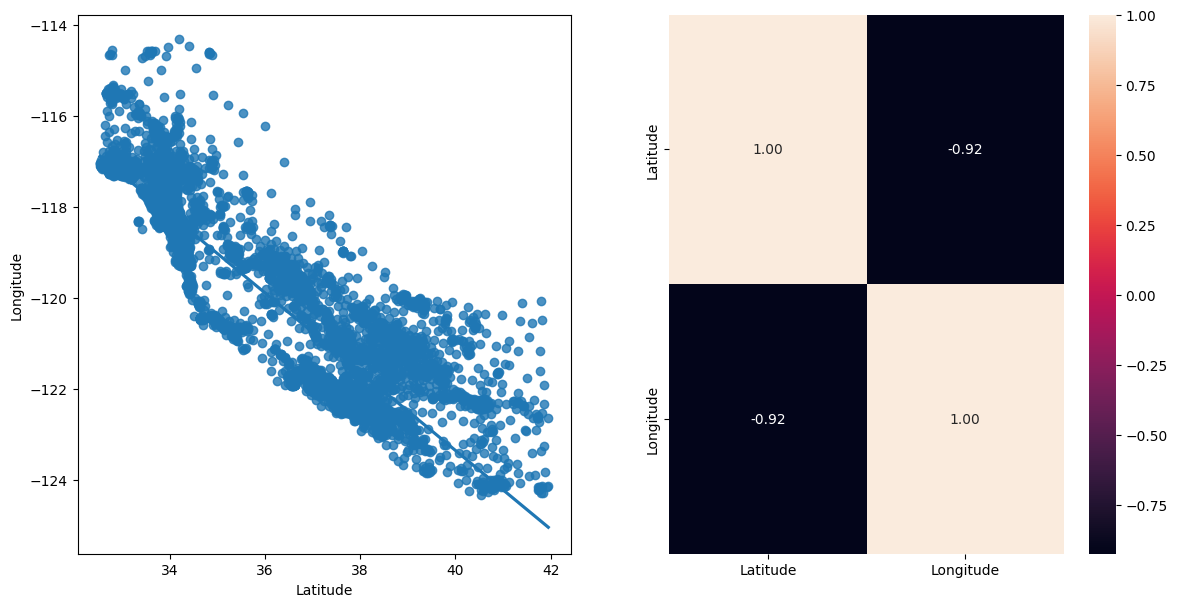

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Comparamos dos variables con regplot y heatmap
fig, axis = plt.subplot_mosaic([['a1','a2']], figsize = (14, 7))

data = all_numericas
x_1 = 'Latitude'
y_1 = 'Longitude'

sns.regplot(ax = axis['a1'], data = data, x = x_1, y = y_1)
sns.heatmap(data[[x_1, y_1]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])


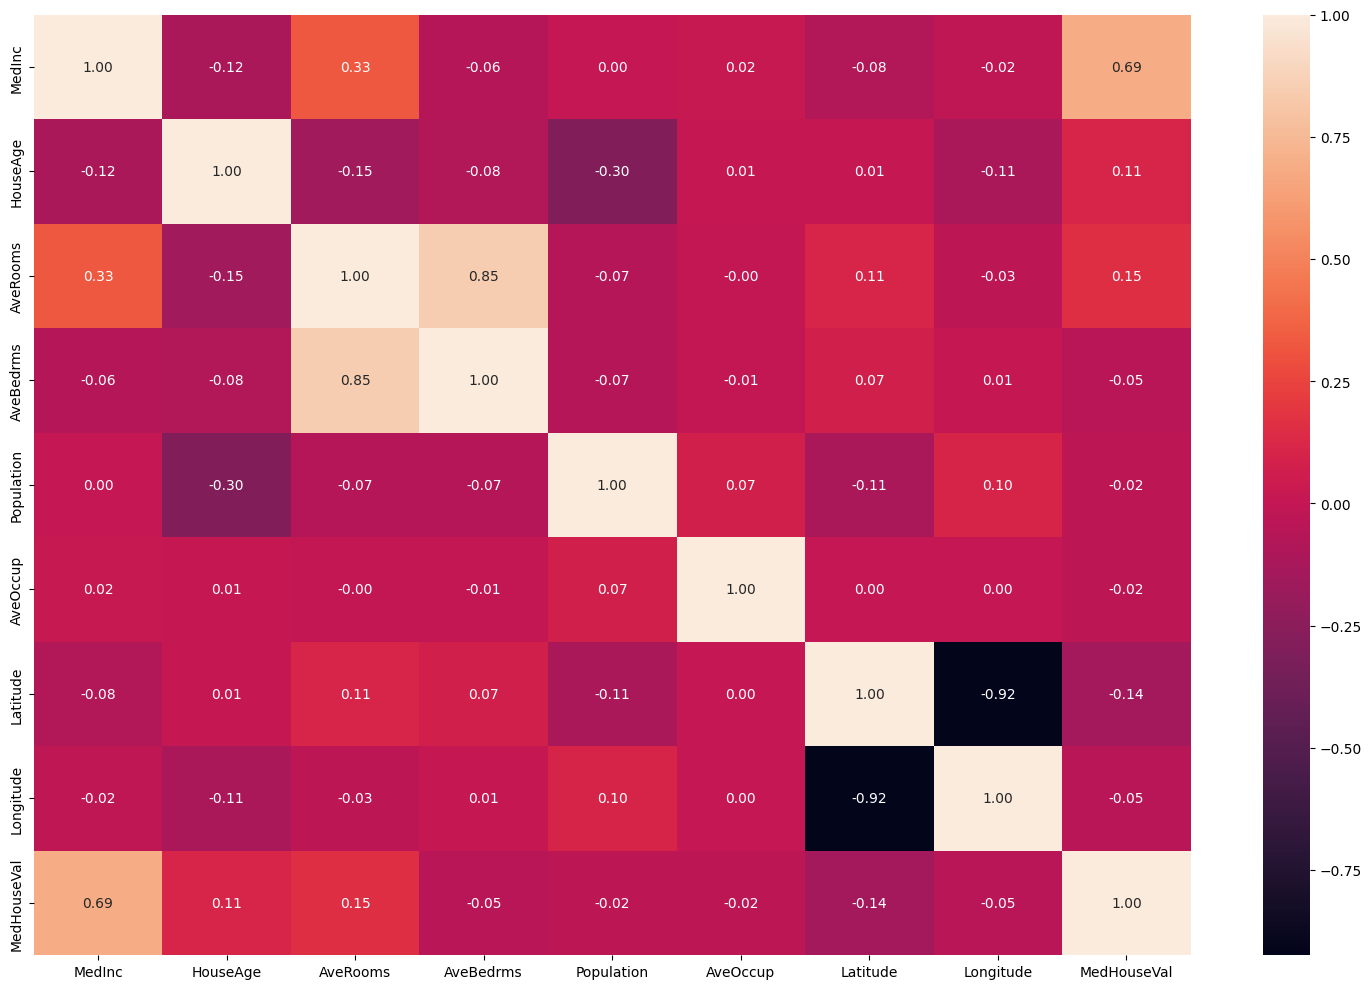

In [6]:
#Creamos el heatmap

import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap((all_numericas.corr()), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

### Outliers Analysis

In [7]:
import pandas as pd


dataframe = df
valor_outlier = 8
columna_outlier = 'MedInc'
outliers_arriba = True


if outliers_arriba:

    #Contamos el total de outliers
    total_outliers = dataframe[dataframe[columna_outlier] > valor_outlier].count()
    total_outliers_count = total_outliers.iloc[0]

    #Calculamos el porcentaje de outliers
    porcentaje_outlier = total_outliers_count / len(dataframe) * 100
    print(f'El numero de outliers en {columna_outlier} que tenemos sobre {valor_outlier} es {total_outliers_count} valores')
    print(f'Siendo el {porcentaje_outlier:.2f}% de nuestro dataset de {len(dataframe)} filas')

else:

    #Contamos el total de outliers
    total_outliers = dataframe[dataframe[columna_outlier] < valor_outlier].count()
    total_outliers_count = total_outliers.iloc[0]

    #Calculamos el porcentaje de outliers
    porcentaje_outlier = total_outliers_count / len(dataframe) * 100
    print(f'El numero de outliers en {columna_outlier} que tenemos bajo {valor_outlier} es {total_outliers_count} valores')
    print(f'Siendo el {porcentaje_outlier:.2f}% de nuestro dataset de {len(dataframe)} filas')



El numero de outliers en MedInc que tenemos sobre 8 es 690 valores
Siendo el 3.34% de nuestro dataset de 20640 filas


### Train - Test Split

In [ ]:
#Dividimos en Train - Tests / Predictoras - Target

from sklearn.model_selection import train_test_split

size_test= 0.2
target = ''

X = all_numericas.drop(target,axis=1)
y = all_numericas[target]

# Usar stratify solo en clasificación, nunca en regresión
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = size_test, random_state = 42, stratify=y)


### Feature scaling (Normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Guardamos las columnas
X_train_columns = X_train.columns
X_test_columns = X_test.columns

#Normalizamos las predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Guardamos los datos normalizados con sus columnas y sus indices
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_train_columns)


In [ ]:
import pickle

#Cambiar el objeto por el que queramos guardar
objeto = scaler

ruta_guardado = '../models/scaler.pkl'

with open(ruta_guardado, "wb") as archivo:
    pickle.dump(objeto, archivo)

In [ ]:
# save as csv

# Con Index = False, no guardamos el indice en el archivo resultante
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
X_train_scaled.to_csv("../data/processed/X_train_scaled.csv", index=False)
X_test_scaled.to_csv("../data/processed/X_test_scaled.csv", index=False)

y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)
